# 2D PNG to 3D GLB Render

Reference: Pixel2Mesh

Wang, N., Zhang, Y., Li, Z., Fu, Y., Liu, W., & Jiang, Y. G. (2018). Pixel2mesh: Generating 3d mesh models from single rgb images. In Proceedings of the European Conference on Computer Vision (ECCV) (pp. 52-67).

## Installing Dependencies

In [1]:
!git clone https://github.com/mathigatti/Pixel2Mesh.git

Cloning into 'Pixel2Mesh'...
remote: Enumerating objects: 139, done.
remote: Total 139 (delta 0), reused 0 (delta 0), pack-reused 139
Receiving objects: 100% (139/139), 5.79 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gD-dk-XrAa5mfrgdZSunjaS6pUUWsZgU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1gD-dk-XrAa5mfrgdZSunjaS6pUUWsZgU" -O checkpoints.zip && rm -rf /tmp/cookies.txt
!unzip checkpoints.zip -d /content/Pixel2Mesh/Data

--2022-07-20 03:07:34--  https://docs.google.com/uc?export=download&confirm=t&id=1gD-dk-XrAa5mfrgdZSunjaS6pUUWsZgU
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.102, 142.250.141.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/53u06fr4ur5nou2sdb2k12gtpd5lf3pu/1658286450000/09894763150769114285/*/1gD-dk-XrAa5mfrgdZSunjaS6pUUWsZgU?e=download&uuid=428b14f6-ac37-4dab-9885-f24ea65b7e89 [following]
--2022-07-20 03:07:34--  https://doc-04-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/53u06fr4ur5nou2sdb2k12gtpd5lf3pu/1658286450000/09894763150769114285/*/1gD-dk-XrAa5mfrgdZSunjaS6pUUWsZgU?e=download&uuid=428b14f6-ac37-4dab-9885-f24ea65b7e89
Resolving doc-04-0k-docs.googleusercontent.com (doc-04-0k-docs.googleusercontent.com)... 142.251.2.13

In [3]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [4]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2022-07-20 03:08:36--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2022-07-20 03:08:37--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?4RWq-fVjzZNy44l1gaw7kNmIXuiOsJhJvl_7SPdwsZjLslpmJqDZB7Vy_VgBRnIctfjZHVZdKuKv6

In [5]:
!find / -name 7fa2af80.pub

find: ‘/proc/27/task/27/net’: Invalid argument
find: ‘/proc/27/net’: Invalid argument
/var/cuda-repo-8-0-local-ga2/7fa2af80.pub


In [6]:
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub

OK


In [7]:
!apt-get update
!apt-get install cuda-8-0

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bion

In [8]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [9]:
!python2 -m pip install tensorflow==1.3.0
!python2 -m pip install tflearn==0.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43.1MB 1.3MB/s 
     |████████████████████████████████| 1.0MB 39.7MB/s 
     |████████████████████████████████| 1.6MB 39.6MB/s 
     |████████████████████████████████| 890kB 58.6MB/s 
     |████████████████████████████████| 307kB 43.9MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp27-none-any.whl size=107221 sha256=21ca529bbb9e55b591cd2860666cd98915b1d7f1d3b3bacc820f519fd82c6f38
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102kB 6.7MB/s 
     |████████████████████████████████| 2.1MB 32.6MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp27-none

In [10]:
! python2 -m pip install -U scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5MB 2.1MB/s 
     |████████████████████████████████| 4.4MB 39.3MB/s 
     |████████████████████████████████| 24.8MB 1.8MB/s 
     |████████████████████████████████| 1.7MB 28.3MB/s 
     |████████████████████████████████| 12.8MB 300kB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |████████████████████████████████| 512kB 56.8MB/s 
     |████████████████████████████████| 256kB 58.8MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1527321 sha256=caf7254ba43da52d2290918c024aa6db1db4cd5933eea9e25f3ce60fdd65b3ee
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built networkx


In [11]:
! pip install obj2html
! wget https://gitlab.com/nicolalandro/obj2html/-/raw/main/test/assets/model.obj
from obj2html import obj2html
from IPython.display import display, HTML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for obj2html: filename=obj2html-0.14-py3-none-any.whl size=5108 sha256=29e53ccd10980d3722f739890c70182d4ba473fb84fbceec0ad05139c981b6d4
  Stored in directory: /root/.cache/pip/wheels/73/39/65/ab00199175d01f6d2e02edcbe94c96df85cdedbc0d949c4e84
Successfully built obj2html
--2022-07-20 03:12:51--  https://gitlab.com/nicolalandro/obj2html/-/raw/main/test/assets/model.obj
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9887179 (9.4M) [text/plain]
Saving to: ‘model.obj’

model.obj           100%[===================>]   9.43M  26.8MB/s    in 0.4s    

2022-07-20 03:12:52 (26.8 MB/s) - ‘model.obj’ saved [9887179/9887179]



In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# %matplotlib inline

# figure size in inches optional
# rcParams['figure.figsize'] = 11 ,8

## Deployment

In [13]:
%cd /content/Pixel2Mesh

/content/Pixel2Mesh


In [49]:
import sys

folder = "none"
if("--image" in  sys.argv):
    folder = sys.argv[sys.argv.index("--image") + 1]     

# INPUT FILENAME BELOW
filename = "chair.png"
filefolder = "Data/examples"
# filepath = os.path.join(filefolder, filename)
!python2 demo.py --image Data/examples/box.png

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
2022-07-20 03:45:59.232771: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2022-07-20 03:45:59.232822: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2022-07-20 03:45:59.232835: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2022-07-20 03:45:59.232845: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2022-07-20 03:45

## .obj to .glb (For JS)

In [ ]:
%cd /content/Pixel2Mesh/Data/examples

In [ ]:
# ! pip3 install pixiedust
# ! pip3 install pixiedust_node

In [ ]:
# import pixiedust_node

In [ ]:
%%node
npm install -g obj2gltf

In [ ]:
%%node
const obj2gltf = require("obj2gltf");
const fs = require("fs");
obj2gltf("aloe-removebg-preview.obj").then(function (gltf) {
  const data = Buffer.from(JSON.stringify(gltf));
  fs.writeFileSync("aloe-removebg-preview.gltf", data);
});

## Results

#### Smartphone Images of Everyday Objects to 3D render: Tub of Aloe, Earpods, Wireless Mouse

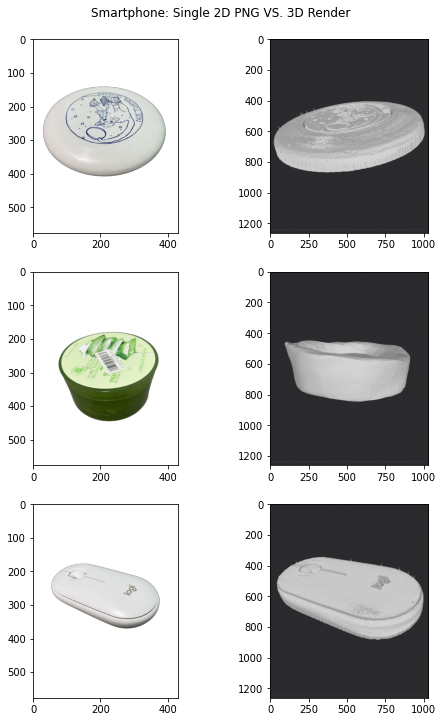

In [51]:
# read images
img_A = mpimg.imread('Data/examples/frisbee.png')
img_B = mpimg.imread('Data/examples/3d_frisbee.png')
img_C = mpimg.imread('Data/examples/aloe.png')
img_D = mpimg.imread('Data/examples/3d_aloe.png')
img_E = mpimg.imread('Data/examples/mouse.png')
img_F = mpimg.imread('Data/examples/3d_mouse.png')
images = [img_A, img_B, img_C, img_D, img_E, img_F]

plt.figure(figsize=(8,15))
plt.subplots_adjust(top=0.95)
plt.suptitle('Smartphone: Single 2D PNG VS. 3D Render')
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

#### Low Quality Stock Images to 3D render: Lamp, Chair, Plane

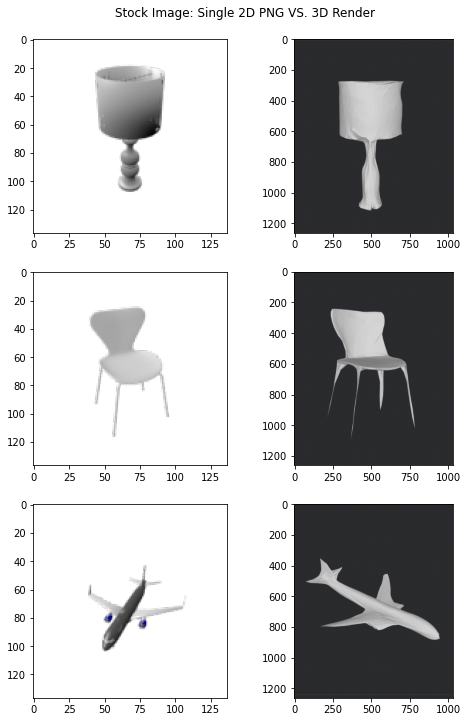

In [52]:
# read images
img_A = mpimg.imread('Data/examples/lamp.png')
img_B = mpimg.imread('Data/examples/3d_lamp.png')
img_C = mpimg.imread('Data/examples/chair.png')
img_D = mpimg.imread('Data/examples/3d_chair.png')
img_E = mpimg.imread('Data/examples/plane.png')
img_F = mpimg.imread('Data/examples/3d_plane.png')
images = [img_A, img_B, img_C, img_D, img_E, img_F]

plt.figure(figsize=(8,15))
plt.subplots_adjust(top=0.95)
plt.suptitle('Stock Image: Single 2D PNG VS. 3D Render')
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [25]:
obj2html('Data/examples/lamp.obj', 'index1.html')
display(HTML('index1.html'))

In [27]:
obj2html('Data/examples/chair.obj', 'index1.html')
display(HTML('index1.html'))

In [28]:
obj2html('Data/examples/plane.obj', 'index1.html')
display(HTML('index1.html'))